### PCA in Machine Learning Workflows
#### Machine Learning I - Maestría en Analítica Aplicada
#### Universidad de la Sabana
#### Prof: Hugo Franco
#### Example: Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import time


The IRIS dataset is used to illustrate the usage of PCA in a Supervised Learning pipeline

In [2]:
# Load and prepare the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 1. Train baseline k-NN model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model without PCA
start_time = time.time()
baseline_model = KNeighborsClassifier(n_neighbors=3)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_time = time.time() - start_time

print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, baseline_pred):.4f}")
print(f"Training time: {baseline_time:.4f} seconds\n")



Baseline Model Performance:
Accuracy: 1.0000
Training time: 0.0040 seconds



In [3]:
# 2. Create and train Pipeline with PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

start_time = time.time()
pca_pipeline.fit(X_train, y_train)
pipeline_pred = pca_pipeline.predict(X_test)
pipeline_time = time.time() - start_time

print("PCA Pipeline Performance:")
print(f"Accuracy: {accuracy_score(y_test, pipeline_pred):.4f}")
print(f"Training time: {pipeline_time:.4f} seconds\n")

PCA Pipeline Performance:
Accuracy: 0.9333
Training time: 0.0781 seconds



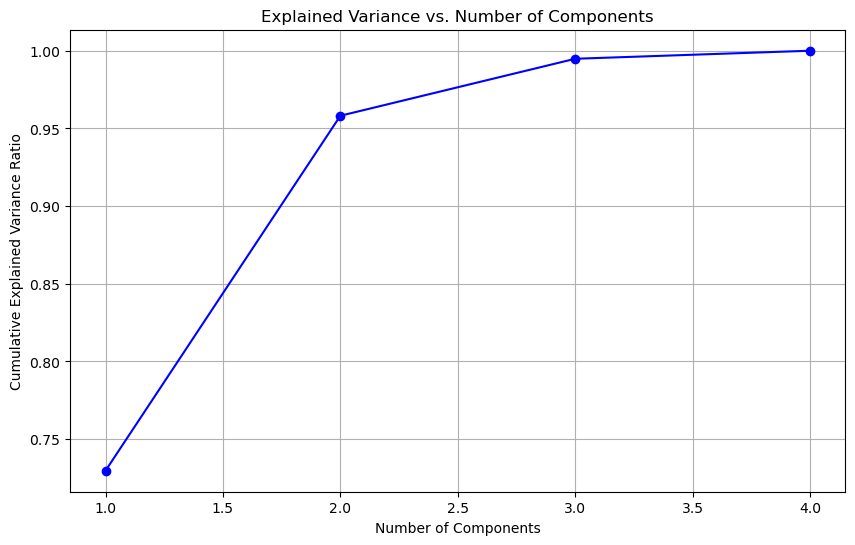

In [4]:
# 3. Analyze explained variance ratio
pca = PCA()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

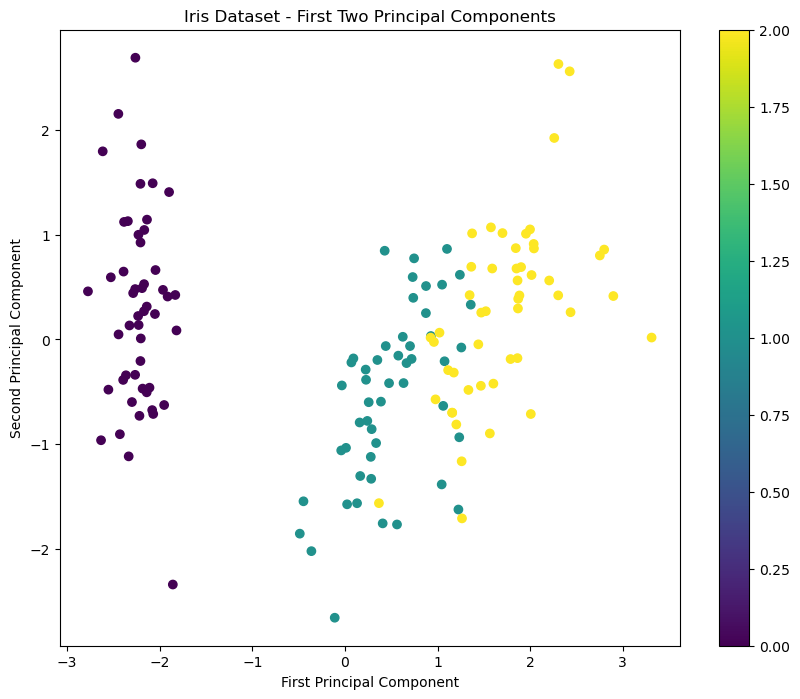

Explained variance ratio for first two components:
PC1: 0.7296
PC2: 0.2285
Total: 0.9581


In [5]:
# 4. Visualize 2D projection
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title('Iris Dataset - First Two Principal Components')
plt.colorbar(scatter)
plt.show()

# Print the explained variance ratio for the first two components
print("Explained variance ratio for first two components:")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"Total: {sum(pca_2d.explained_variance_ratio_):.4f}")

#### Class activity - Workshop 3 Challenge: 
1. Add and organize this example according to the Data Science Workflow
2. Apply the workflow to the wine dataset
3. Complete the steps in the Supervised Learning Workflow for Data Science according to data preparation and per-model requirements and recommendations in this course, up-to-date
4. **Compare the classification performance using the complete set of original features and using only two PCA-transformed features.**
5. Modify the example to perform only a binary classification (good > 6) and compare your results with the multiclass performance

##### Wine Dataset Description
The Wine Quality dataset contains features like acidity, pH, alcohol content, and quality ratings. We'll convert the quality ratings into a binary classification problem.

* Number of instances: 1599
* Features: 11 physicochemical properties
* Target: Binary (Good/Poor quality) and multiclass (Poor, Fair, and Good quality)
* Features include:
* Fixed acidity
* Volatile acidity
* Citric acid
* Residual sugar
* Chlorides
* Free sulfur dioxide
* Total sulfur dioxide
* Density
* pH
* Sulphates
* Alcohol

Three-Class Distribution:
 quality_class
poor    744
fair    638
good    217
Name: count, dtype: int64


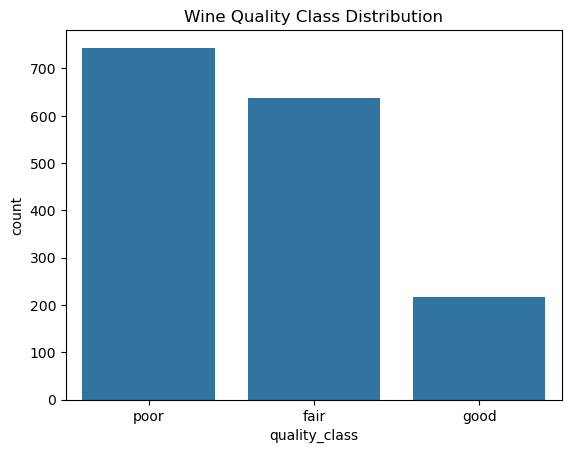

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Load wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Convert quality scores to three classes
def quality_to_class(quality):
    if quality <= 5:
        return 'poor'
    elif quality <= 6:
        return 'fair'
    else:
        return 'good'

# Add new column with three classes
df['quality_class'] = df['quality'].apply(quality_to_class)

# Show distribution of new classes
print("Three-Class Distribution:\n", df['quality_class'].value_counts())

# Visualize class distribution
plt.figure()
sns.countplot(data=df, x='quality_class', order=['poor', 'fair', 'good'])
plt.title('Wine Quality Class Distribution')
plt.show()


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_class         1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB
None


In [32]:
# Load and prepare the wine dataset
X = df.drop(['quality','quality_class'], axis=1)
y = df['quality_class']

# 1. Train baseline k-NN model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Baseline model without PCA
start_time = time.time()
baseline_model = KNeighborsClassifier(n_neighbors=3)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_time = time.time() - start_time

print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, baseline_pred):.4f}")
print(f"Training time: {baseline_time:.4f} seconds\n")



Baseline Model Performance:
Accuracy: 0.5594
Training time: 0.0056 seconds



In [33]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

start_time = time.time()
pca_pipeline.fit(X_train, y_train)
pipeline_pred = pca_pipeline.predict(X_test)
pipeline_time = time.time() - start_time

print("PCA Pipeline Performance:")
print(f"Accuracy: {accuracy_score(y_test, pipeline_pred):.4f}")
print(f"Training time: {pipeline_time:.4f} seconds\n")

PCA Pipeline Performance:
Accuracy: 0.5719
Training time: 0.0101 seconds



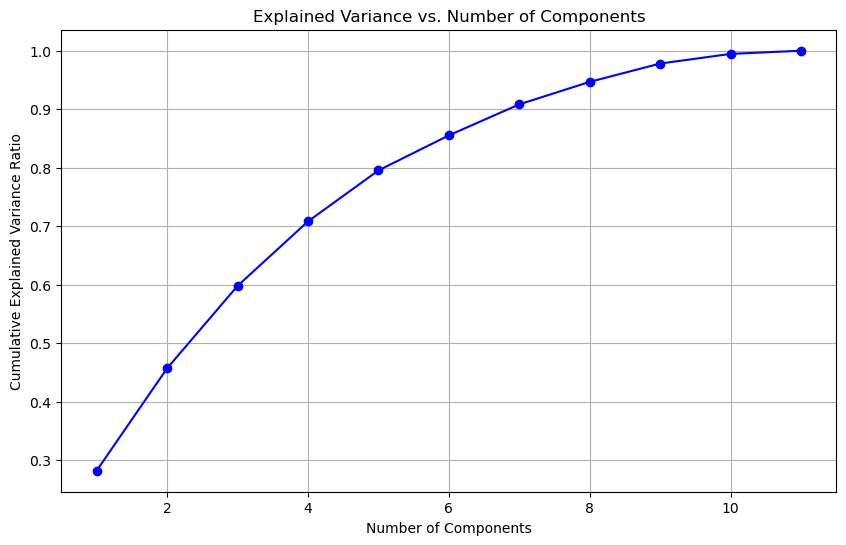

In [34]:
pca = PCA()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

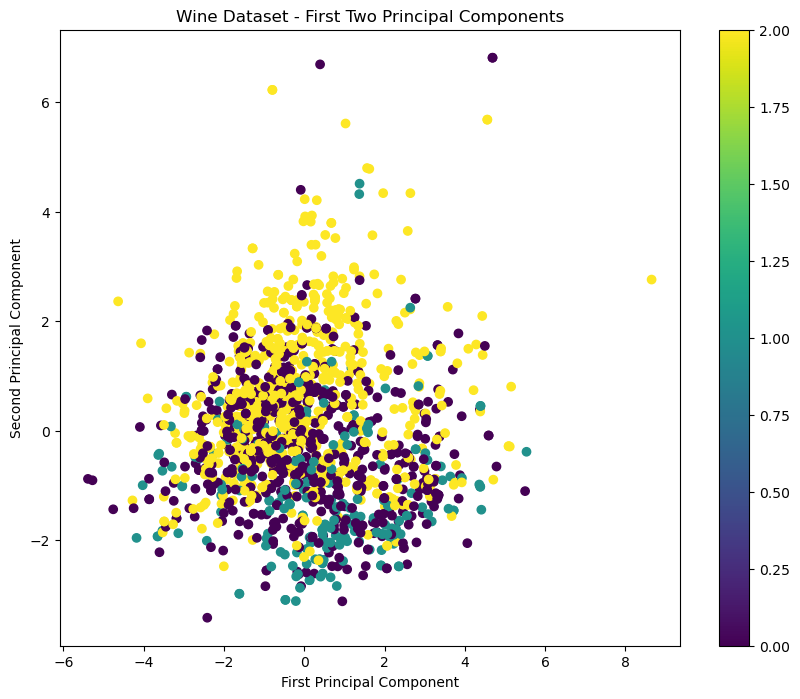

Explained variance ratio for first two components:
PC1: 0.2817
PC2: 0.1751
Total: 0.4568


In [35]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

le = LabelEncoder()
y = le.fit_transform(y)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title('Wine Dataset - First Two Principal Components')
plt.colorbar(scatter)
plt.show()

# Print the explained variance ratio for the first two components
print("Explained variance ratio for first two components:")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"Total: {sum(pca_2d.explained_variance_ratio_):.4f}")

## Binary Comparison


Three-Class Distribution:
 quality_class
good    855
poor    744
Name: count, dtype: int64


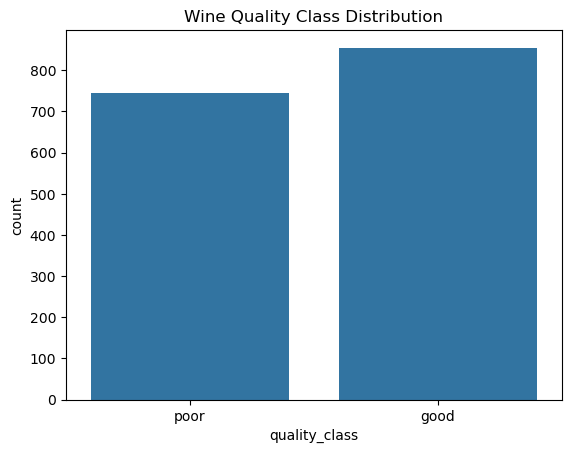

In [36]:
# Load wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df1 = pd.read_csv(url, sep=';')

# Convert quality scores to three classes
def quality_to_class(quality):
    if quality <= 5:
        return 'poor'
    else:
        return 'good'

# Add new column with three classes
df1['quality_class'] = df1['quality'].apply(quality_to_class)

# Show distribution of new classes
print("Three-Class Distribution:\n", df1['quality_class'].value_counts())

# Visualize class distribution
plt.figure()
sns.countplot(data=df1, x='quality_class', order=['poor', 'good'])
plt.title('Wine Quality Class Distribution')
plt.show()

In [37]:
# Load and prepare the wine dataset
X = df1.drop(['quality','quality_class'], axis=1)
y = df1['quality_class']

# 1. Train baseline k-NN model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Baseline model without PCA
start_time = time.time()
baseline_model = KNeighborsClassifier(n_neighbors=3)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_time = time.time() - start_time

print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, baseline_pred):.4f}")
print(f"Training time: {baseline_time:.4f} seconds\n")



Baseline Model Performance:
Accuracy: 0.7188
Training time: 0.0064 seconds



In [38]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

start_time = time.time()
pca_pipeline.fit(X_train, y_train)
pipeline_pred = pca_pipeline.predict(X_test)
pipeline_time = time.time() - start_time

print("PCA Pipeline Performance:")
print(f"Accuracy: {accuracy_score(y_test, pipeline_pred):.4f}")
print(f"Training time: {pipeline_time:.4f} seconds\n")

PCA Pipeline Performance:
Accuracy: 0.6250
Training time: 0.0070 seconds



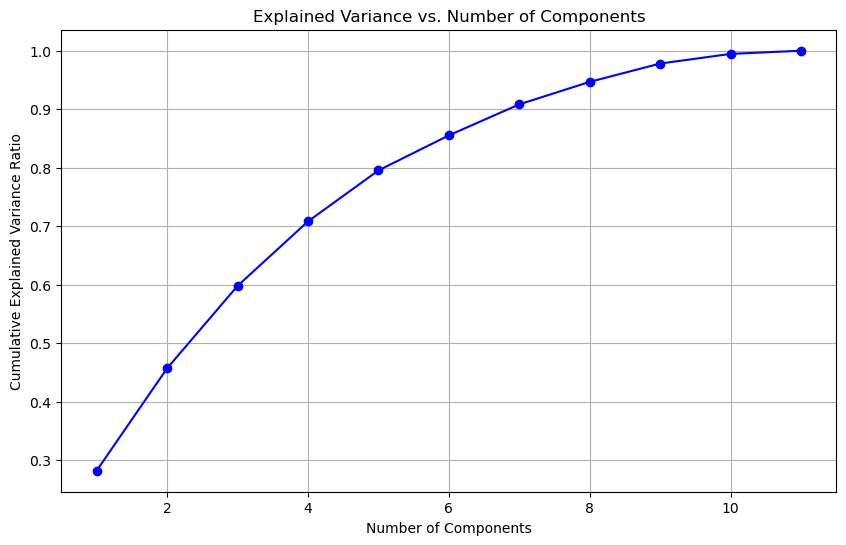

In [39]:
pca = PCA()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

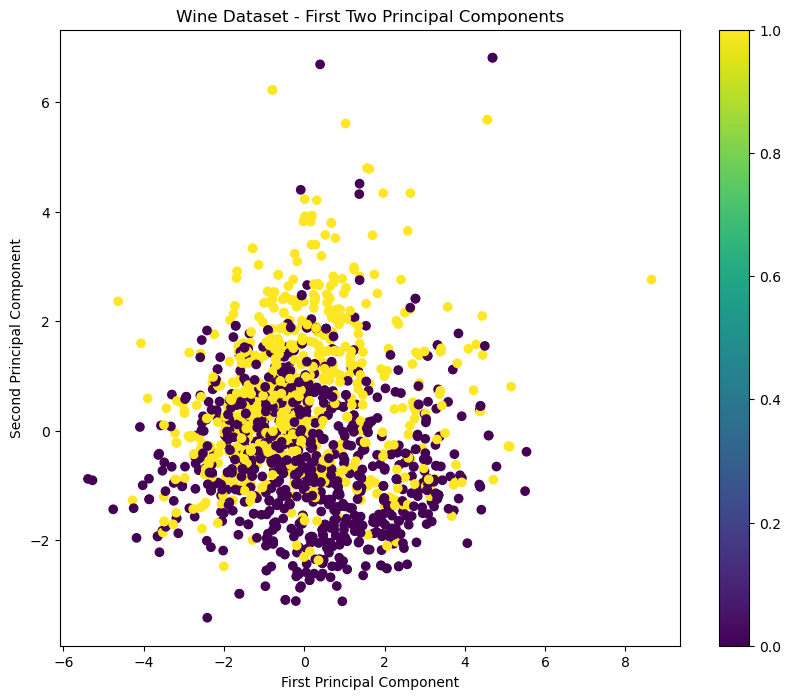

Explained variance ratio for first two components:
PC1: 0.2817
PC2: 0.1751
Total: 0.4568


In [40]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

le = LabelEncoder()
y = le.fit_transform(y)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title('Wine Dataset - First Two Principal Components')
plt.colorbar(scatter)
plt.show()

# Print the explained variance ratio for the first two components
print("Explained variance ratio for first two components:")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"Total: {sum(pca_2d.explained_variance_ratio_):.4f}")